In [28]:
# 导入工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1 数据读取&数据预处理
order_date 销售日期
sales_region_code 产品所在区域--类别型
first_cate_code 八大品类--类别型
second_cate_code 十二大小品类--类别型
sales_chan_name 销售方式--类别型
item_price 销售价格--连续型
is_holiday 节假日--类别型
season 季节--类别型
时间段？

order_date 销售日期 不管
item_code 标识不同产品 不管
ord_qty 销售量 Y

In [56]:
# 读取数据
# order_date 销售日期
data=pd.read_csv("order_train1.csv",encoding='utf-8')

In [58]:
# 数据打标
data=data.replace("offline",0)
data=data.replace("online",1)
data=data.replace("Spring",1)
data=data.replace("Summer",2)
data=data.replace("Autumn",3)
data=data.replace("Winter",4)
data.info()
# 发现没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597694 entries, 0 to 597693
Data columns (total 10 columns):
order_date           597694 non-null object
sales_region_code    597694 non-null int64
item_code            597694 non-null int64
first_cate_code      597694 non-null int64
second_cate_code     597694 non-null int64
sales_chan_name      597694 non-null int64
item_price           597694 non-null float64
ord_qty              597694 non-null int64
is_holiday           597694 non-null int64
season               597694 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 45.6+ MB


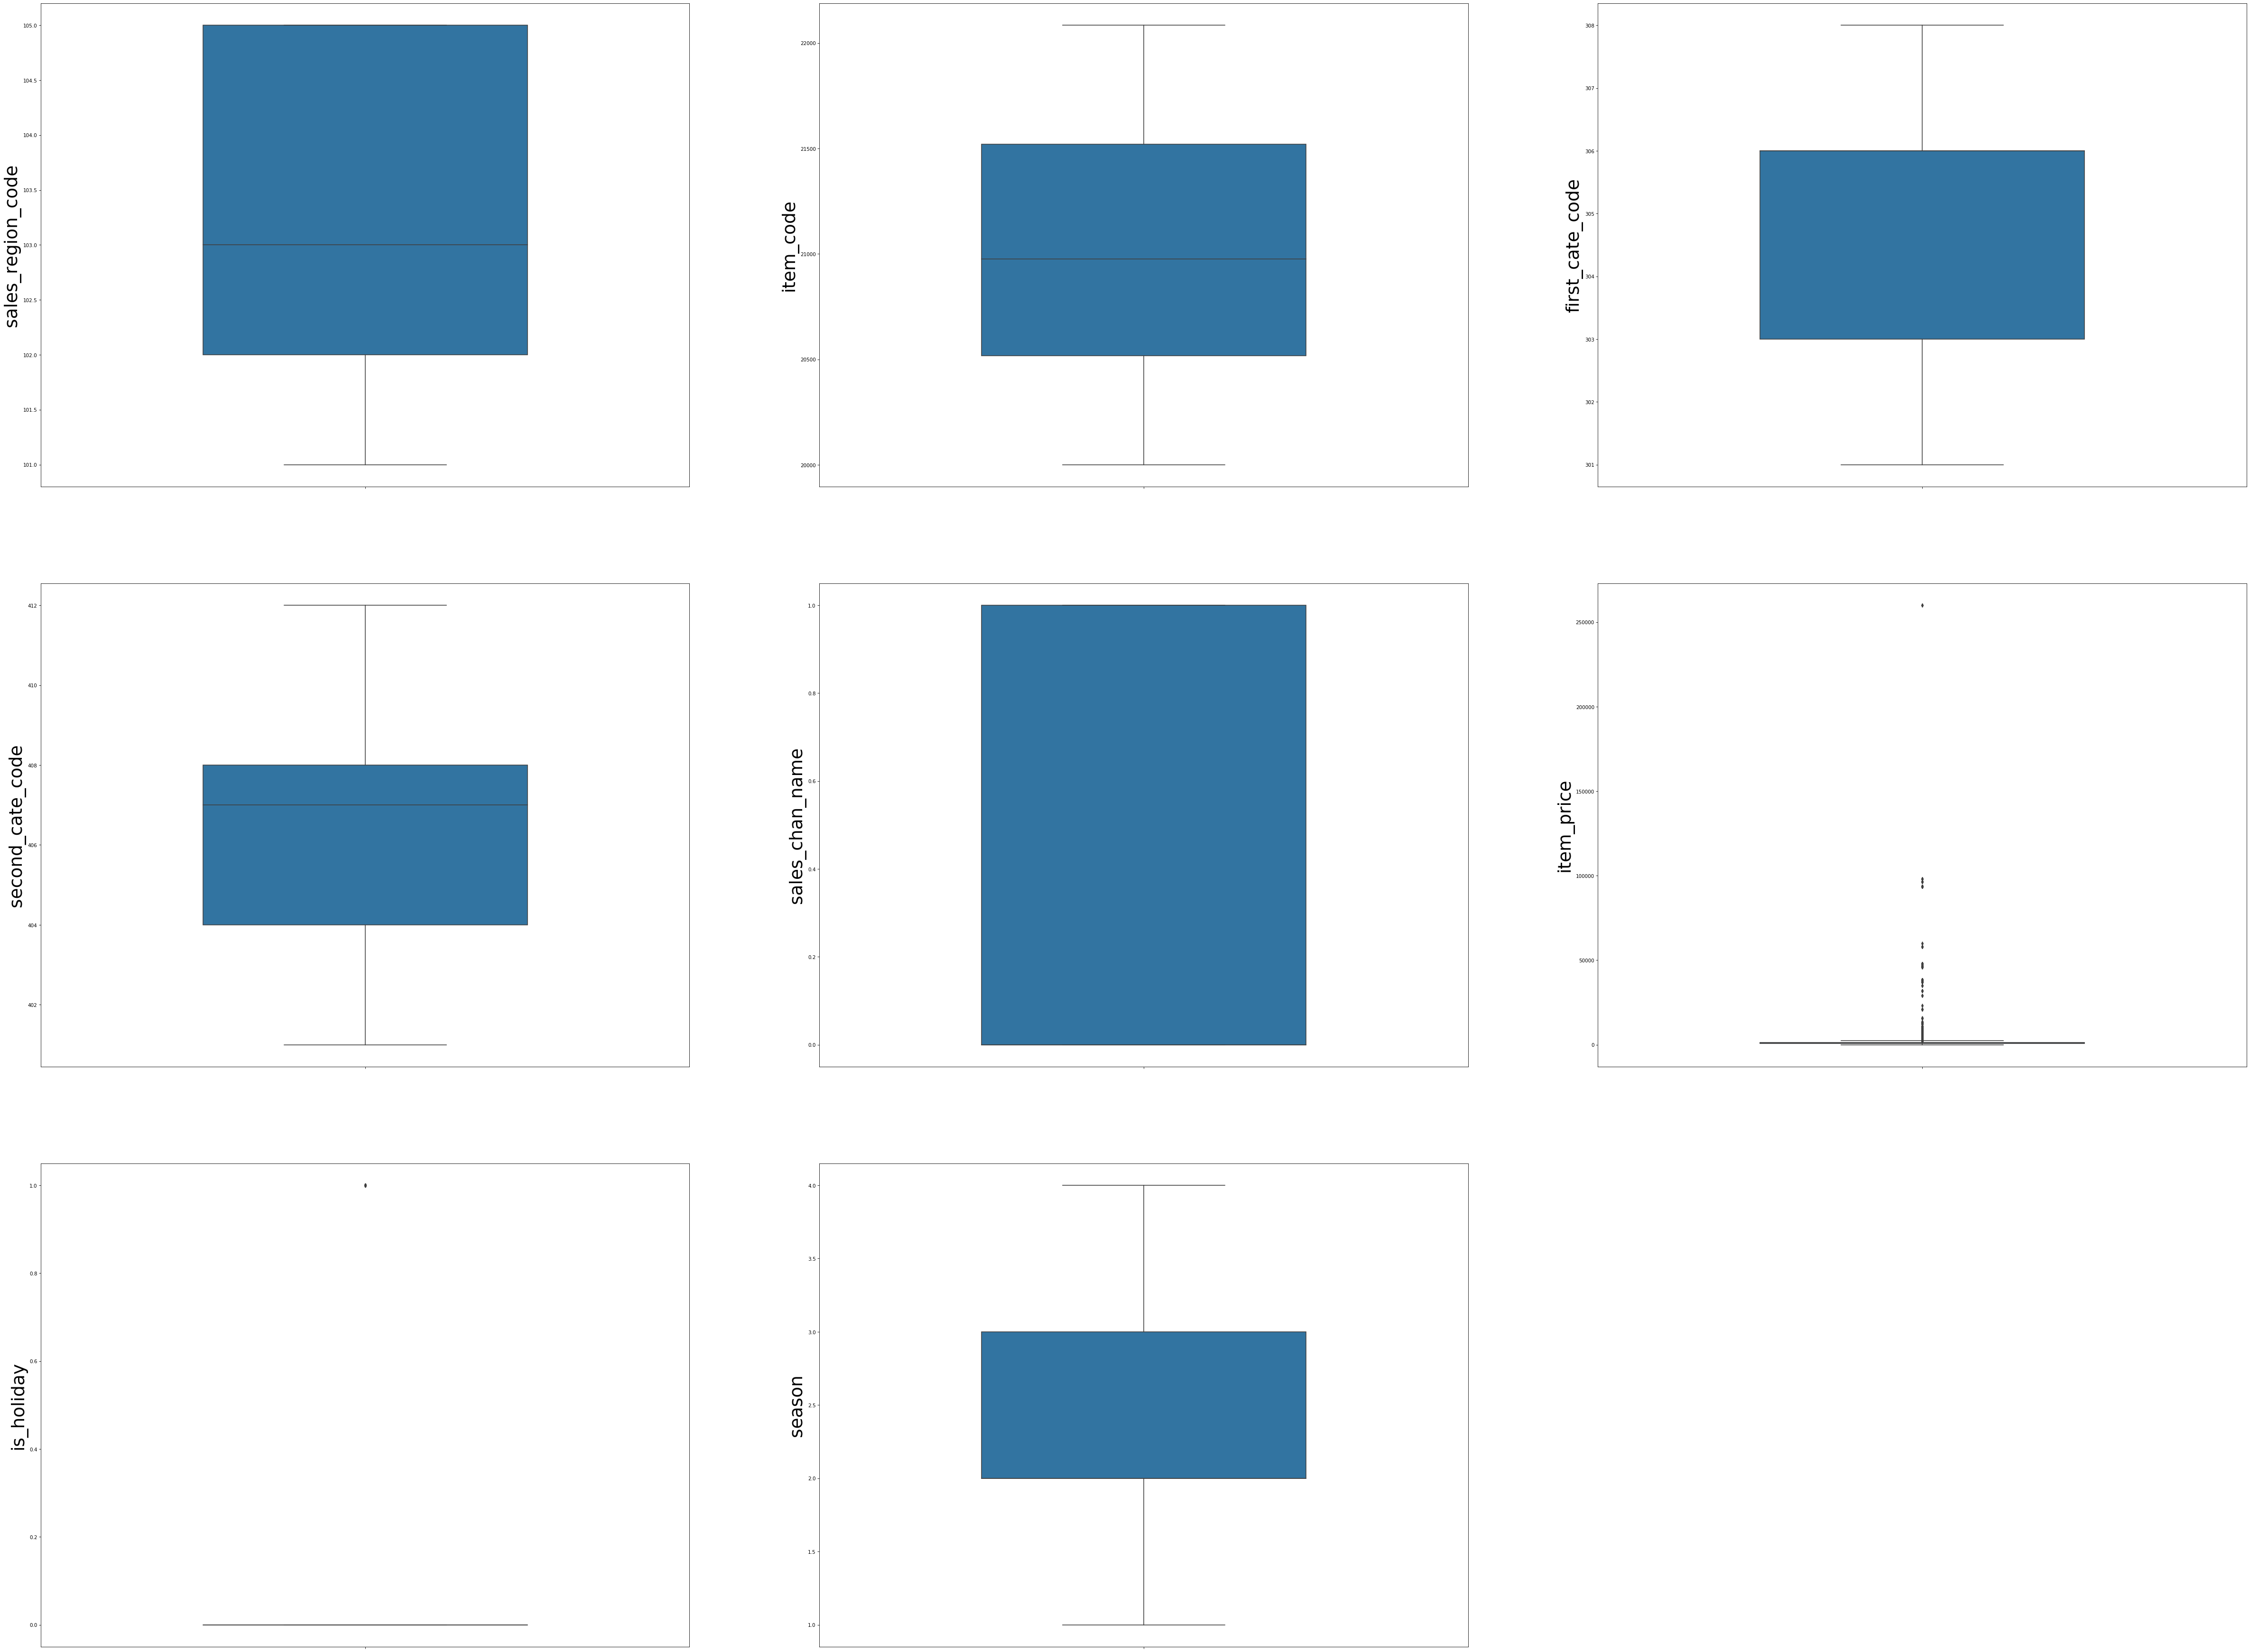

In [60]:
# 异常值处理
# 箱型图 直方图 散点图
# 1 箱型图
factor=data.drop(columns=['order_date','ord_qty'])
column=factor.columns.tolist()
fig=plt.figure(figsize=(80,60),dpi=75)
for i in range(len(column)):
    plt.subplot(3,3,i+1)
    sns.boxplot(factor[column[i]],orient="v",width=0.5)
    plt.ylabel(column[i],fontsize=36)
plt.show()
# 发现除了item_price与is_holiday外其余数据较好
# item_price应按照不同物品分类后再画图

In [ ]:
# 变量转换
# 缩放比例&标准化、非线性关系转为线性、使倾斜分布对症、变量恩组
# Box-Cox

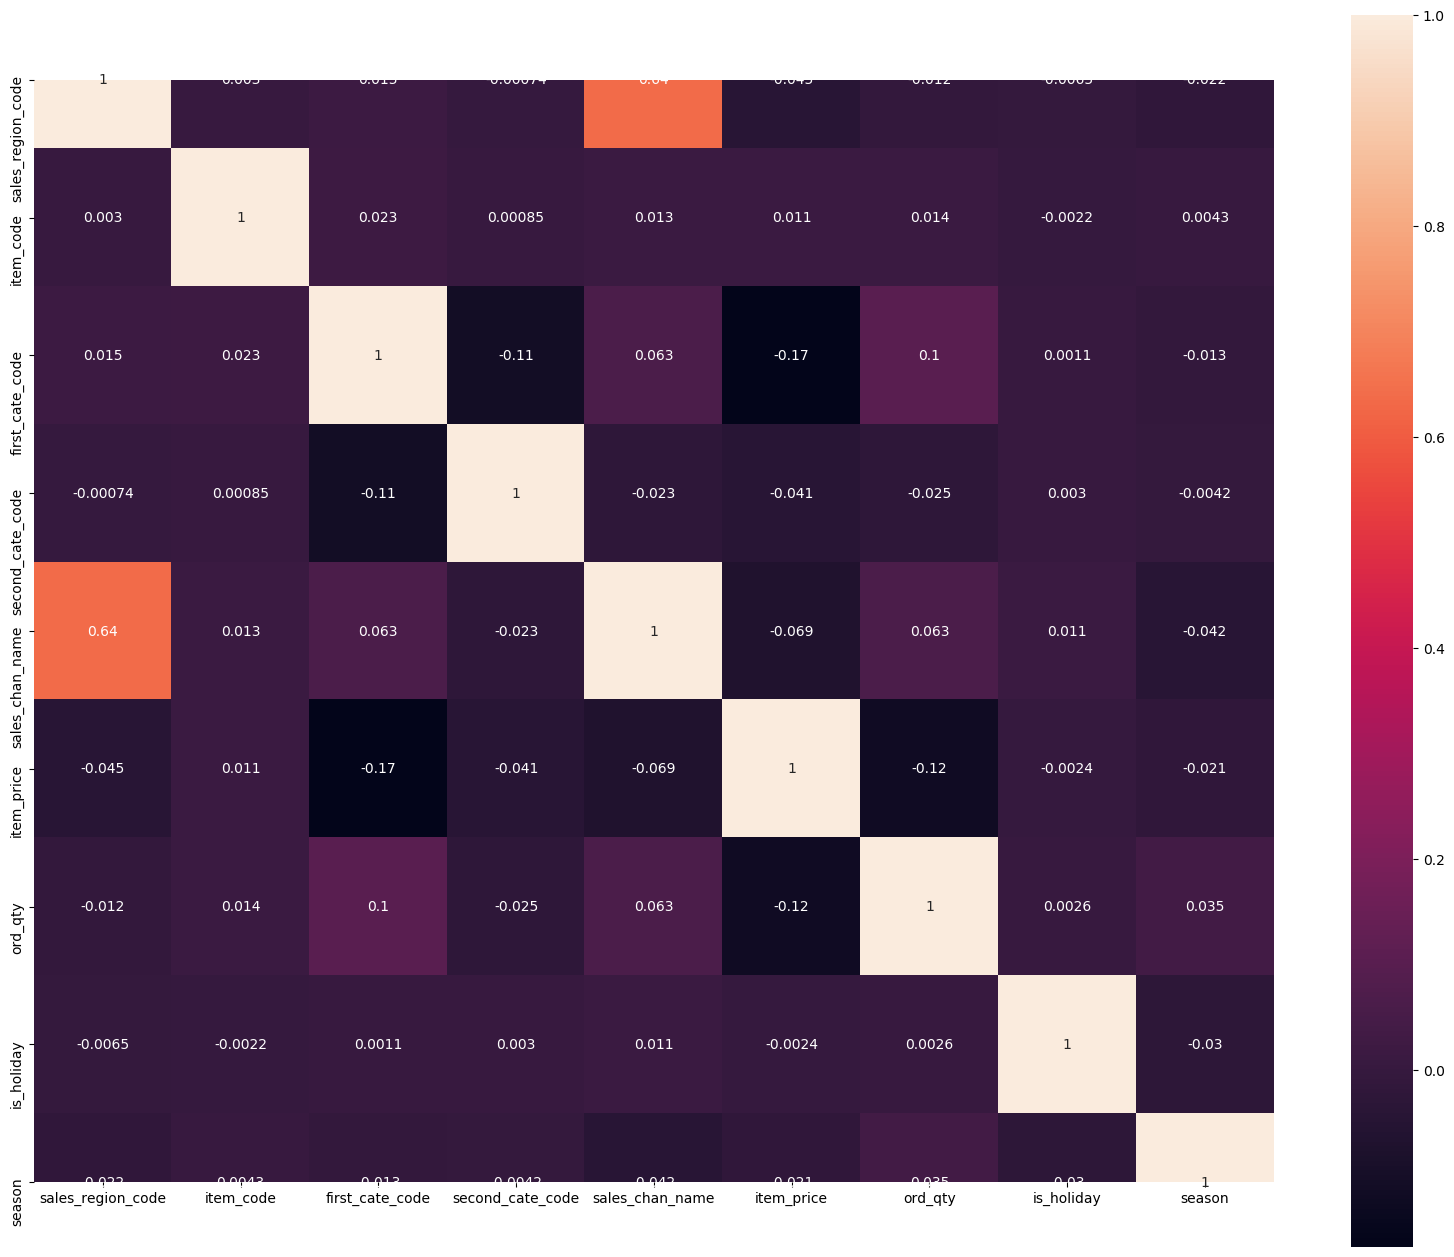

In [62]:
# 查看特征变量的相关性
data_corr=data.corr()
ax=plt.subplots(figsize=(20,16))
ax=sns.heatmap(data_corr,square=True,annot=True)

In [65]:
# 每件产品进行预测
item_code=data['item_code'].unique()
pre_data=data[data['item_code']==22069]
# for code in item_code:
#     pre_data=data[data['item_code']==code]

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,is_holiday,season
0,2015-9-1,104,22069,307,403,0,1114.0,19,0,3
5003,2015-9-19,104,22069,307,403,0,1106.0,7,0,3
5405,2015-9-20,104,22069,307,403,0,1103.0,2,0,3
15711,2015-10-31,104,22069,307,403,0,1110.0,9,0,3
17137,2015-11-7,104,22069,307,403,1,1403.0,10,0,3


In [33]:
# 切分数据
from sklearn.model_selection import train_test_split
train=pre_data.drop(columns=['item_code','ord_qty','order_date'])
target=data['ord_qty']
# 切分数据 训练：验证=7：3
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.3,random_state=0)

In [49]:
# 绘制折线图
def printGraph(y1,y2):
    index=[i for i in range(len(y1))]
    print(y1)
    data=pd.concat([pd.DataFrame(y1,columns=['y1']),pd.DataFrame(y2,columns=['y2'])],axis=1)
    print(data)
    sns.lineplot(x="index",y="value",style="event",data=data)

In [50]:
# 线性回归模型预测
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(train_data,train_target)
test_pred=clf.predict(test_data)
printGraph(test_target,clf.predict(test_data))
score=mean_squared_error(test_target,clf.predict(test_data))
print("LinearRegression: ",score)

15038    11
57942     6
42527    45
16065    35
56010    14
         ..
17991    28
58279    23
27302    17
51625     5
37331    25
Name: ord_qty, Length: 17931, dtype: int64
        y1          y2
0      NaN   62.908454
1      NaN   88.006843
2      NaN   52.255522
3      NaN   87.257375
4      NaN   57.596470
...    ...         ...
17926  NaN   51.759283
17927  NaN  112.908354
17928  NaN   41.590243
17929  NaN  107.849387
17930  NaN   39.576462

[17931 rows x 2 columns]


ValueError: Could not interpret input 'index'

In [37]:
# K近邻回归模型算法
from sklearn.neighbors import KNeighborsRegressor
clf= KNeighborsRegressor(n_neighbors=3)
clf.fit(train_data,train_target)
test_pred=clf.predict(test_data)
score=mean_squared_error(test_target,clf.predict(test_data))
print("KNeighborsRegressor: ",score)

KNeighborsRegressor:  40408.41257536606


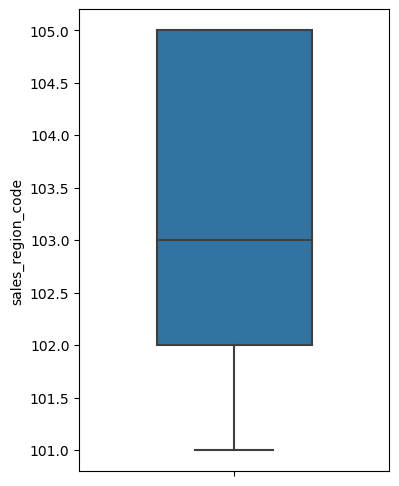

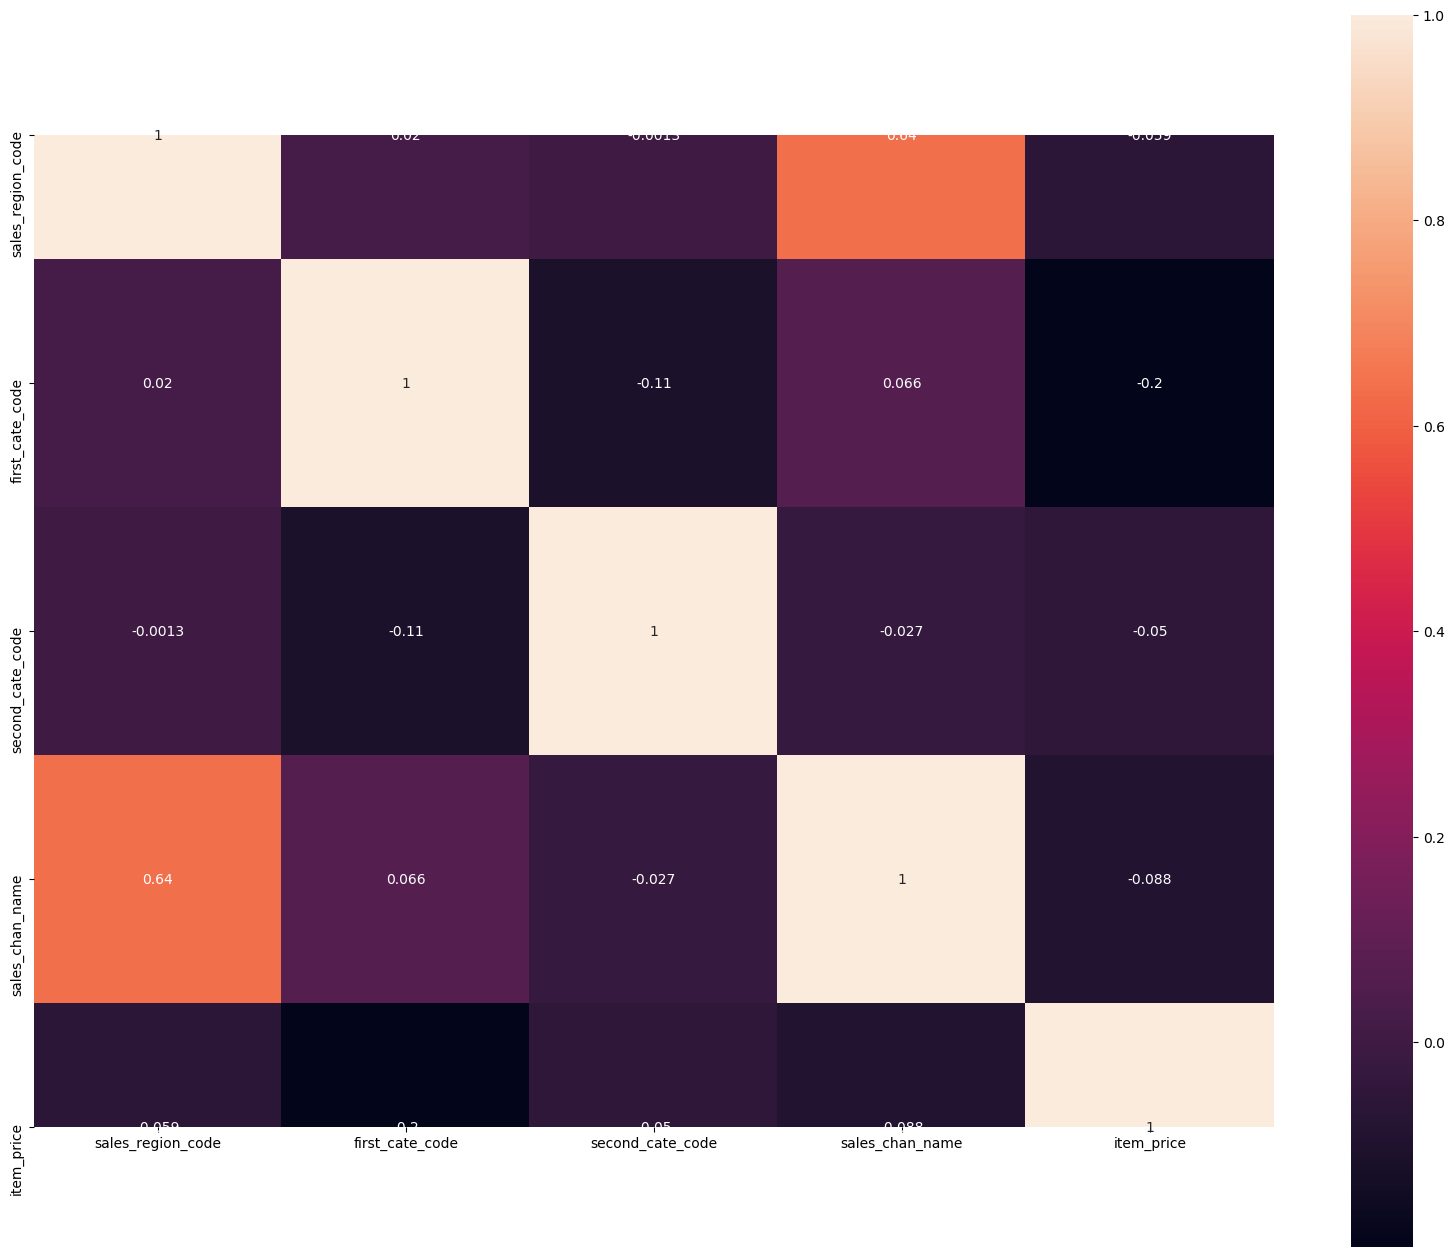